# Zoo problem 

## Importing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### Initial analysis

In [3]:
df.shape

(101, 18)

In [4]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [5]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

## Spilting x and y

In [6]:
X=df.iloc[:,1:17]
y=df.iloc[:,17]

In [7]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

## Model Training | Testing |

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [10]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80, 16), (80,), (21, 16), (21,))

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Generating model with k=3

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524


## Generating model with k=5

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524


## Generating model with k=7

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9048


## picking the optimum number of k?

In [15]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn_model,X=X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [16]:
cv_scores


[0.9800000000000001,
 0.95,
 0.890909090909091,
 0.8418181818181818,
 0.7918181818181818,
 0.7818181818181819,
 0.7718181818181818,
 0.7718181818181818,
 0.761818181818182,
 0.761818181818182,
 0.7818181818181819,
 0.7718181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.6236363636363637,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5536363636363636,
 0.5436363636363637,
 0.5345454545454545]

In [17]:
neighbours[cv_scores.index(max(cv_scores))]

1

# Rebuilding the model with k=1

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  1.0


## Vizualizing the K neighbours wrt CV

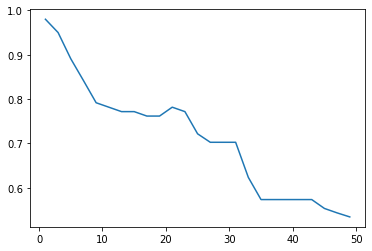

In [19]:
import matplotlib.pyplot as plt
plt.plot(neighbours,cv_scores)
plt.show()

### Conclusion: From the above model, it can be concluded that k=1 is the best model